<a href="https://colab.research.google.com/github/BountyHunter1999/Learning-PyTorch-Notebooks/blob/main/6_ANN_FOR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
np.random.random((1000, 2)).shape

(1000, 2)

In [3]:
X = np.random.random((1000, 2))[:5]
X

array([[0.07420922, 0.19998221],
       [0.500821  , 0.50299276],
       [0.10372759, 0.71267201],
       [0.74935984, 0.7934419 ],
       [0.20770761, 0.33773455]])

In [4]:
X * 6

array([[0.44525534, 1.19989324],
       [3.00492602, 3.01795658],
       [0.62236553, 4.27603203],
       [4.49615904, 4.76065139],
       [1.24624566, 2.0264073 ]])

In [5]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3 * X[:, 1])

This implements the function:
<space> y = cos(2x<sub>1</sub>) + cos(3x<sub>2</sub>)

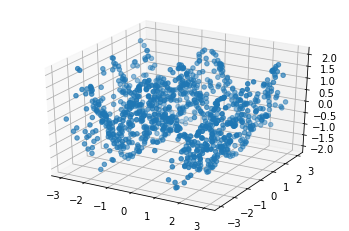

In [6]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [7]:
# Build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [8]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [9]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  # Stuff to store
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    if (it + 1) % 50 == 0:
      print(f"Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}")

  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.6911
Epoch 100/1000, Train Loss: 0.3593
Epoch 150/1000, Train Loss: 0.2233
Epoch 200/1000, Train Loss: 0.1289
Epoch 250/1000, Train Loss: 0.0629
Epoch 300/1000, Train Loss: 0.0246
Epoch 350/1000, Train Loss: 0.0113
Epoch 400/1000, Train Loss: 0.0072
Epoch 450/1000, Train Loss: 0.0055
Epoch 500/1000, Train Loss: 0.0055
Epoch 550/1000, Train Loss: 0.0045
Epoch 600/1000, Train Loss: 0.0039
Epoch 650/1000, Train Loss: 0.0036
Epoch 700/1000, Train Loss: 0.0046
Epoch 750/1000, Train Loss: 0.0038
Epoch 800/1000, Train Loss: 0.0048
Epoch 850/1000, Train Loss: 0.0032
Epoch 900/1000, Train Loss: 0.0031
Epoch 950/1000, Train Loss: 0.0126
Epoch 1000/1000, Train Loss: 0.0028


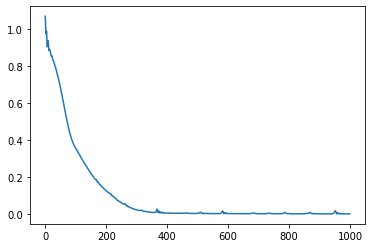

In [10]:
plt.plot(train_losses)

In [17]:
line = np.linspace(-3, 3, 5)
line, line.shape

(array([-3. , -1.5,  0. ,  1.5,  3. ]), (5,))

In [20]:
xx, yy = np.meshgrid(line, line)
xx, xx.shape, yy

(array([[-3. , -1.5,  0. ,  1.5,  3. ],
        [-3. , -1.5,  0. ,  1.5,  3. ],
        [-3. , -1.5,  0. ,  1.5,  3. ],
        [-3. , -1.5,  0. ,  1.5,  3. ],
        [-3. , -1.5,  0. ,  1.5,  3. ]]),
 (5, 5),
 array([[-3. , -3. , -3. , -3. , -3. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 1.5,  1.5,  1.5,  1.5,  1.5],
        [ 3. ,  3. ,  3. ,  3. ,  3. ]]))

In [22]:
xx.flatten(), yy.flatten()

(array([-3. , -1.5,  0. ,  1.5,  3. , -3. , -1.5,  0. ,  1.5,  3. , -3. ,
        -1.5,  0. ,  1.5,  3. , -3. , -1.5,  0. ,  1.5,  3. , -3. , -1.5,
         0. ,  1.5,  3. ]),
 array([-3. , -3. , -3. , -3. , -3. , -1.5, -1.5, -1.5, -1.5, -1.5,  0. ,
         0. ,  0. ,  0. ,  0. ,  1.5,  1.5,  1.5,  1.5,  1.5,  3. ,  3. ,
         3. ,  3. ,  3. ]))

In [24]:
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Xgrid

array([[-3. , -3. ],
       [-1.5, -3. ],
       [ 0. , -3. ],
       [ 1.5, -3. ],
       [ 3. , -3. ],
       [-3. , -1.5],
       [-1.5, -1.5],
       [ 0. , -1.5],
       [ 1.5, -1.5],
       [ 3. , -1.5],
       [-3. ,  0. ],
       [-1.5,  0. ],
       [ 0. ,  0. ],
       [ 1.5,  0. ],
       [ 3. ,  0. ],
       [-3. ,  1.5],
       [-1.5,  1.5],
       [ 0. ,  1.5],
       [ 1.5,  1.5],
       [ 3. ,  1.5],
       [-3. ,  3. ],
       [-1.5,  3. ],
       [ 0. ,  3. ],
       [ 1.5,  3. ],
       [ 3. ,  3. ]])

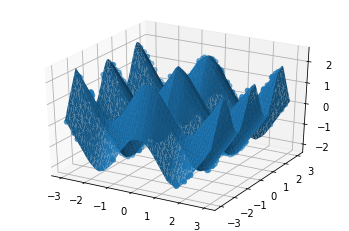

In [13]:
 # Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()
  

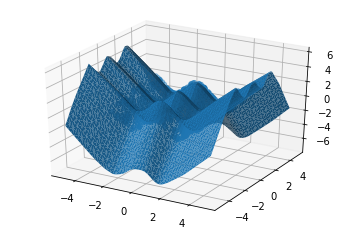

In [27]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,  0], X[:, 1], Y)

# Surface plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()